In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files

# Загрузка файла
uploaded = files.upload()

# Чтение CSV файла
df = pd.read_csv('Mall_Customers.csv')

# Просмотр первых нескольких строк данных
df.head(15)

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
df = df.drop('CustomerID', axis = 1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
print(f"Data has {df.shape[0]} rows, {df.shape[1]} colums.")

Data has 200 rows, 4 colums.


In [4]:
# Проверка информации о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


In [5]:
# Проверка на дубликаты
dublicates = df.duplicated().sum()
print(f'Количество дубликатов: {dublicates}')

Количество дубликатов: 0


In [6]:
df_setect_out=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
df_setect_out

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [7]:
outlier_cols = []

for column in df_setect_out.columns:
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Annual Income (k$)']


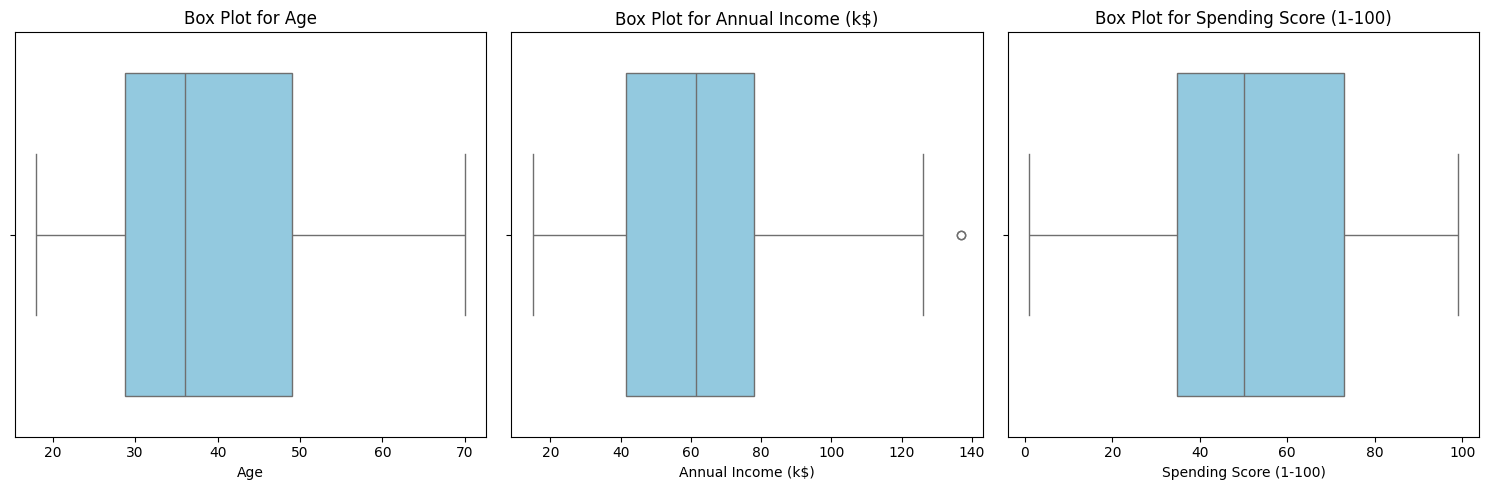

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(15, 5))

for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [9]:
data = {
    'Annual Income (k$)' : [137, 138, 139, 140]
}

df_select_out = pd.DataFrame(data)

def replace_outliers(column, replace_value):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value

for col in ['Annual Income (k$)']:
    replace_outliers(df_select_out[col], replace_value=df_select_out[col].median())

<ipython-input-9-c0ffafccfe3a>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '138.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value


In [10]:
from sklearn.preprocessing import OrdinalEncoder
categorical_colums = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_colums])
df[categorical_colums] = encoded_data.astype(int)

df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


<Axes: >

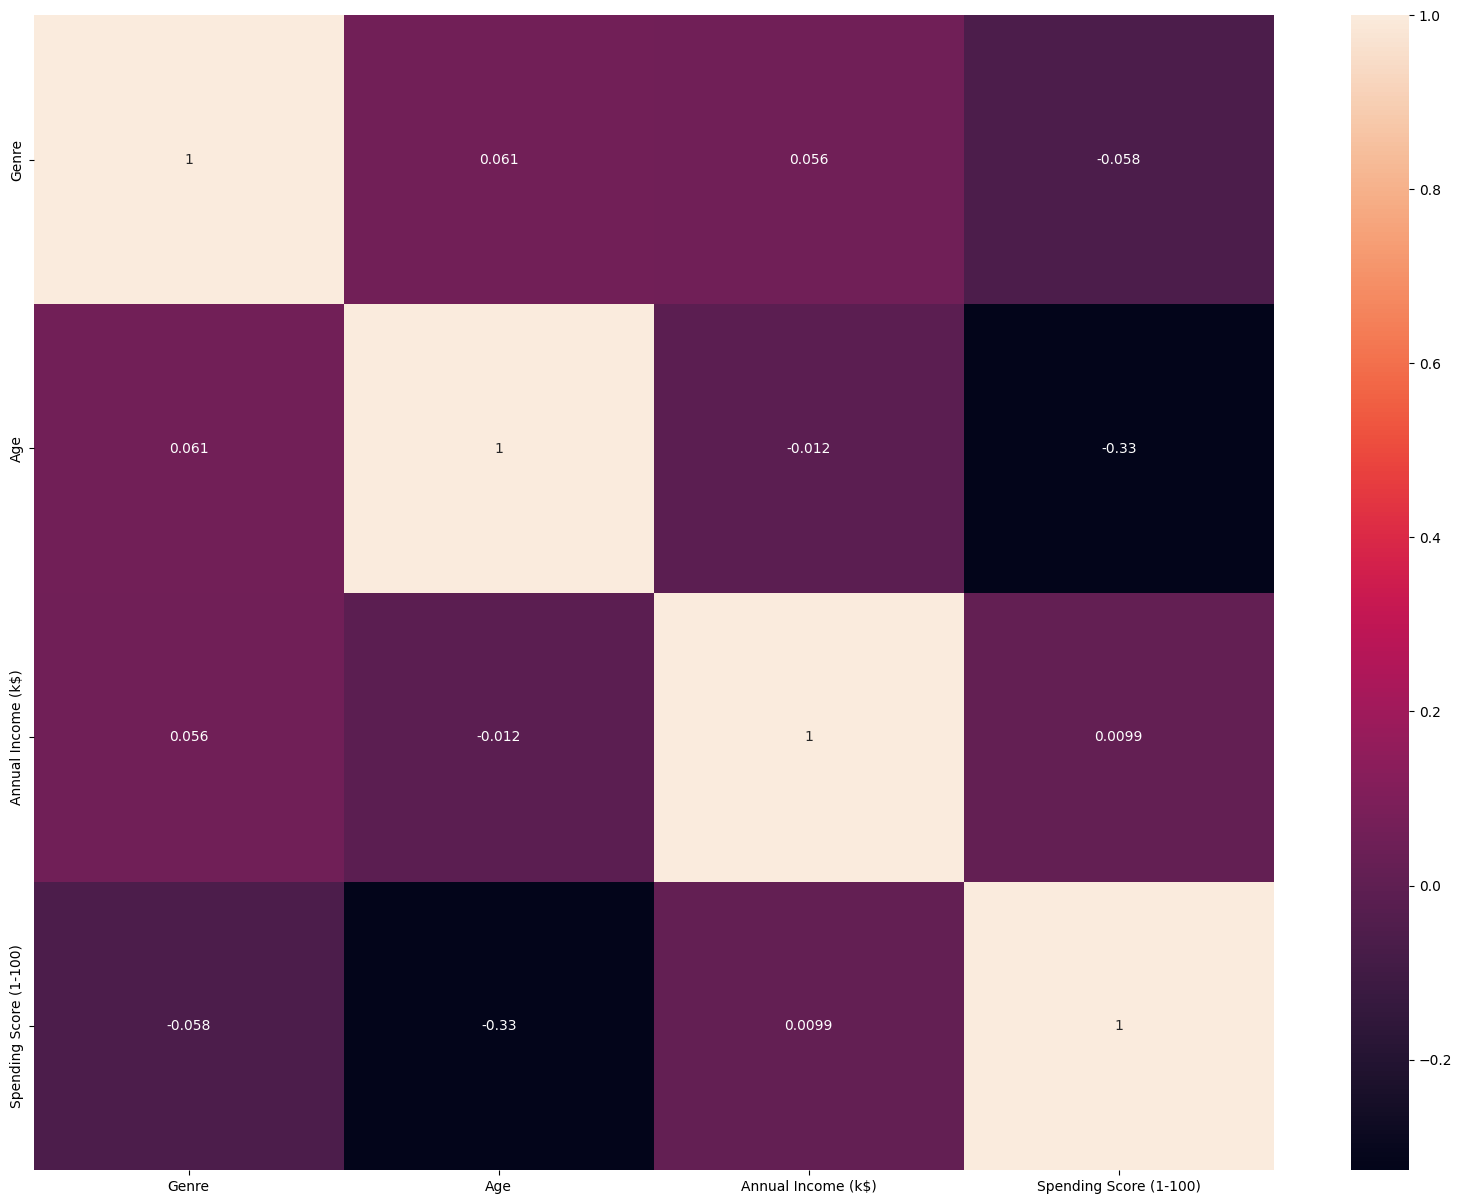

In [11]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.values[:, 1:]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [26]:
from sklearn.cluster import KMeans
K = 3
k_means = KMeans(init = 'k-means++', n_clusters = K, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [27]:
df['Clus_km'] = labels
df.head(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clus_km,Cluster
0,1,19,15,39,1,-1
1,1,21,15,81,1,0
2,0,20,16,6,1,-1
3,0,23,16,77,1,0
4,0,31,17,40,1,-1


In [28]:
df.groupby('Clus_km').mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
Clus_km,,,,,
0,0.461538,32.692308,86.538462,82.128205,3.102564
1,0.406504,40.325203,44.154472,49.829268,1.341463
2,0.526316,40.394737,87.000000,18.631579,0.210526


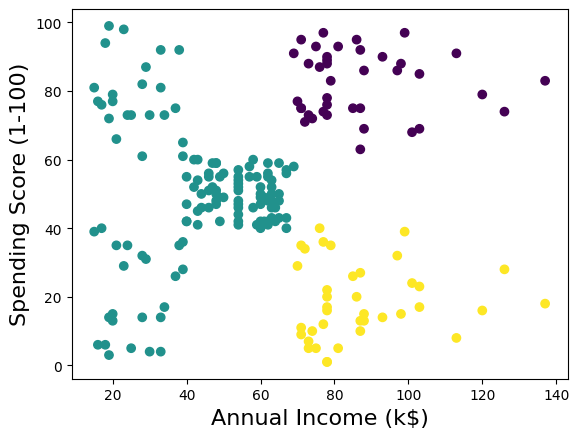

In [29]:

plt.scatter(X[:, 1], X[:, 2], c=labels.astype(float), alpha=1)
plt.xlabel('Annual Income (k$)', fontsize = 16)
plt.ylabel('Spending Score (1-100)', fontsize = 16)

plt.show()

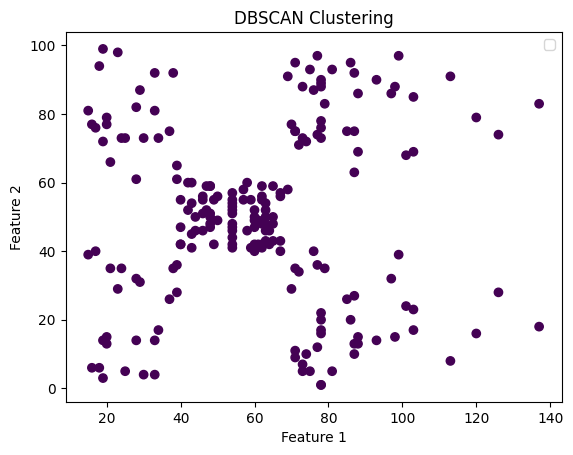

In [21]:
from sklearn.cluster import DBSCAN

# Параметры DBSCAN
# Максимальное расстояние между двумя образцами для того, чтобы считаться в одном кластере
eps = 0.2
# Минимальное количество образцов в окрестности точки для того, чтобы считаться ядром кластера
min_samples = 2

# Применение DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Визуализация результатов
plt.scatter(X[:, 1], X[:, 2],c=labels.astype(float), alpha=1)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Для визуализации кластеров требуется двумерный набор данных.
